## Burgers (Liquid)

In [3]:
using RHEOS
using PyPlot

In [2]:
BurgersLiquid


Model name: burgerliquid

Free parameters: η₁, k₁, η₂ and k₂


                                                         ___
                                                 _________| |________
                 ___                            |        _|_| η₂     |
             _____| |________╱╲  ╱╲  ╱╲  _______|                    |____
                 _|_|          ╲╱  ╲╱  ╲╱       |                    |
                    η₁                  k₁      |____╱╲  ╱╲  ╱╲  ____|
                                                       ╲╱  ╲╱  ╲╱
                                                                 k₂

                

### Constitutive equation
$\sigma(t) + p_1 \frac{d \sigma(t)}{dt} + p_2  \frac{d^2 \sigma(t)}{dt^2} = q_1  \frac{d \epsilon(t)}{dt} + q_2  \frac{d^2 \epsilon(t)}{dt^2}$

where $p_1 = \frac{\eta_1}{k_1}+\frac{\eta_1}{k_2}+\frac{\eta_1}{k_2}$, $p_2 = \frac{\eta_1 \eta_2}{k_1 k_2}$, $q_1 =  \eta_1$ and $q_2 = \frac{\eta_1 \eta_2}{k_2}$.

### Relaxation modulus
$G(t) = \left[ \left(q_1 - q_2 r_1\right) e^{-r_1 t}  - \left(q_1 - q_2 r_2\right) e^{-r_2 t} \right]/A$

where $r_1 = (p_1-A)/2p_2$, $r_2 = (p_1 +A) /2p_2$, and $A = \sqrt{p_1^2 - 4p_2}$

### Creep modulus
$J(t) = \frac{1}{k_1} + \frac{t}{\eta_1} + \frac{1}{k_2} \left(1-e^{-k_2 t/\eta_2}\right)$

### Storage modulus
$G^{\prime}(\omega) = \frac{p_1 q_1 \omega^2 - q_2 \omega^2 (1-p_2 \omega^2)}{p_1^2 \omega^2 + (1-p_2 \omega^2)^2}$

### Loss modulus
$G^{\prime \prime}(\omega) = \frac{p_1 q_2 \omega^3 + q_1 \omega (1-p_2 \omega^2)}{p_1^2 \omega^2 + (1-p_2 \omega^2)^2}$

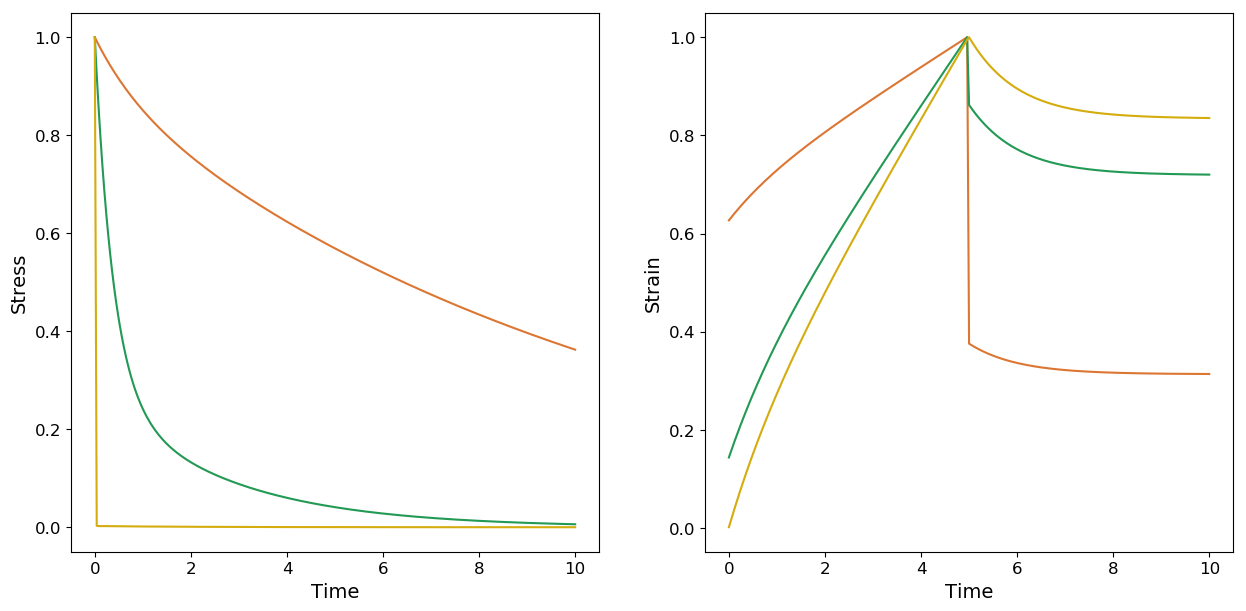

In [11]:
# Create a time only dataset
dϵ = timeline()
dσ = timeline()

# calculate a strain/stress data by appling a function of time (by defalut a unit step otherwise substitute hstep(amp = 2.))
dϵ = strainfunction(dϵ, hstep())
dσ = stressfunction(dσ, hstep()) - stressfunction(dσ, hstep(offset = 5.0))

fig, ax = subplots(1,2, figsize=(15,7))
colplot = ["#dc7633", "#229954", "#d4ac0d"]

# plot moduli for varying k₁
for (i,k) in enumerate([0.1, 1.0, 100.0])
    
    burgers_model = RheoModel(BurgersLiquid,(η₁ = 1, k₁ = k, η₂ = 1, k₂ = 1))
    
    #Relaxation modulus
    dG_burgers = modelpredict(dϵ, burgers_model)
    ax[1].plot(dG_burgers.t, dG_burgers.σ./maximum(dG_burgers.σ), color=colplot[i])
    
    # Creep modulus
    dJ_burgers = modelpredict(dσ, burgers_model)
    ax[2].plot(dJ_burgers.t, dJ_burgers.ϵ./maximum(dJ_burgers.ϵ), color=colplot[i])
 
end

ax[1].set_xlabel("Time", fontsize = 14);
ax[1].set_ylabel("Stress", fontsize = 14);
ax[1].tick_params("both", labelsize=12);

ax[2].set_xlabel("Time", fontsize = 14);
ax[2].set_ylabel("Strain", fontsize = 14);
ax[2].tick_params("both", labelsize=12);

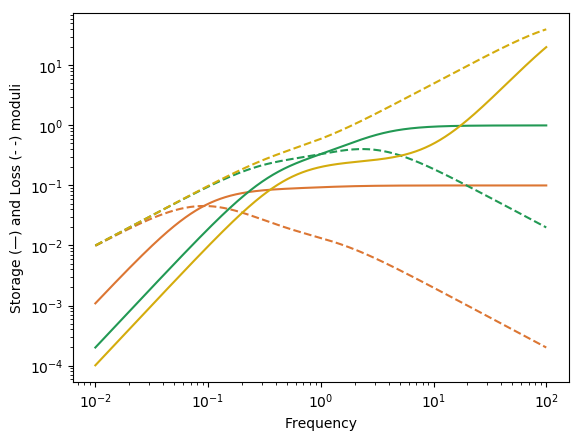

In [10]:
dω = frequencyspec()

colplot = ["#dc7633", "#229954", "#d4ac0d"]

# plot moduli for varying k₁
for (i,k) in enumerate([0.1, 1.0, 100.0])
    
    burgers_model = RheoModel(BurgersLiquid,(η₁ = 1, k₁ = k, η₂ = 1, k₂ = 1))
    
    # Storage and Loss moduli
    d_burgers = dynamicmodelpredict(dω, burgers_model)
    loglog(d_burgers.ω, d_burgers.Gp, color=colplot[i], "-")
    loglog(d_burgers.ω, d_burgers.Gpp, color=colplot[i], "--")
end

xlabel("Frequency");
ylabel("Storage (—) and Loss (- -) moduli");

**Reference** 

Findley, William N., and Francis A. Davis. Creep and relaxation of nonlinear viscoelastic materials. Courier Corporation, 2013.